## Import and Load

In [51]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [52]:
files = ['/Volumes/MyPassport/GoogleSync/ResearchImac/SPRINGBOARD/DementiaPrediction/Data/oasis_cross-sectional.csv',
         '/Volumes/MyPassport/GoogleSync/ResearchImac/SPRINGBOARD/DementiaPrediction/Data/oasis_longitudinal.csv']

# Read in data 
dfs = [pd.read_csv(f) for f in files]
long_df = dfs[1]

In [53]:
# file = '/Users/macos/Google Drive/ResearchImac/SPRINGBOARD/DementiaPrediction/Data/oasis_longitudinal.csv'
# long_df = pd.read_csv(file)

## Understanding Data and Variables

In [54]:
# Top of the data
long_df.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

In [55]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


>
> This dataset consists of a longitudinal collection of 150 subjects aged 60 to 96. We see data type of each feature along with non-null counts. In this longitudinal study each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

In [56]:
long_df.Age.unique()

array([87, 88, 75, 76, 80, 90, 83, 85, 71, 73, 93, 95, 68, 69, 66, 78, 81,
       82, 77, 86, 92, 84, 72, 61, 64, 74, 60, 62, 91, 79, 89, 70, 94, 97,
       65, 67, 63, 96, 98])

>Dementia is a general term for a decline in mental ability severe enough to interfere with daily life. Memory loss is an example. Dementia is not a specific disease. It’s an overall term that describes a group of symptoms associated with a decline in memory or other thinking skills severe enough to reduce a person’s ability to perform everyday activities.
>
>Minimum two of the followings must be significanlty impaired in a subject in order for the subject can be considered having dementia: 
>
>- Memory,
>- Communication and Language
>- Ability to focus and pay attention
>- Reasoning and judgement
>- Visual perception
>
>
>There is no one test to determine if someone has dementia. Doctors diagnose Alzheimer's and other types of dementia based on a careful medical history, a physical examination, laboratory tests, and the characteristic changes in thinking, day-to-day function and behavior associated with each type. Doctors can determine that a person has dementia with a high level of certainty. But it's harder to determine the exact type of dementia because the symptoms and brain changes of different dementias can overlap. In some cases, a doctor may diagnose "dementia" and not specify a type. If this occurs it may be necessary to see a specialist such as a neurologist or gero-psychologist.
[source](https://www.alz.org/alzheimers-dementia/what-is-dementia) 
>
>On the basis of our data we will use CDR(Clinical Dementia Rating) that is using a structured-interview protocol developed by Charles Hughes,[1] Leonard Berg, John C. Morris and other colleagues at Washington University School of Medicine, a qualified health professional assesses a patient's cognitive and functional performance.
[source](https://en.wikipedia.org/wiki/Clinical_Dementia_Rating)
>
>The CDR score, a dementia staging tool,  is used to indicate the status of dementia. This tool assign a score consists of rating processes of the subject for cognitive performance in six different domains: memory, orientation, judgement and problem solving, function in community affairs, home and hobbies, and personal care. The ratings obtained from those domains are used to derive global CDR score for each subject ranging from 0 to 3 where 0 shows no indication of dementia, 0.5 represents very mild, 1 mild, 2 moderate and 3 indicates severe degree of dementia. All subjects with CDR > 0 are diagnosed with probable AD(Alzheimer's Disease hereafter). 
[source](https://www.mitpressjournals.org/doi/10.1162/jocn.2009.21407)

### Variables

>- Subject Id
>- MRI Id
>- Group :Demented/Undemented/Converted)
>- Visit :Number of visits
>- eTIV - Estimated total intracranial volume, mm3
>- nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
>- ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)
>
>
>**Demographic Data**
>- Gender: (M/F)
>- Hand  :(Right-handed for all subjects )
>- Educ  : Years of education 1:less than high school grad... 5: Beyond College
>- Age   : 60 to 96
>- SES   : Socioeconomic status
>
>**Clinical Data**
>- MMSE : Mini mental stage examination has range from 0 = worst to 30 = best
>- CDR  : Clinical Dementia Rating has range 0 to 3. Above 0.5 is condisered probable AD
>
>
>**MMSE**
>
>The Mini–Mental State Examination (MMSE) or Folstein test is a 30-point questionnaire that is used extensively in clinical and research settings to measure cognitive impairment. It is commonly used in medicine and allied health to screen for dementia. It is also used to estimate the severity and progression of cognitive impairment and to follow the course of cognitive changes in an individual over time; thus making it an effective way to document an individual’s response to treatment. The MMSE’s purpose has been not, on its own, to provide a diagnosis for any particular nosological entity.
>
>- MMSE score $\geq 24$  points (out of 30) indicates a normal cognition. 
>- MMSE score $\leq9$ points severe cognitive impairment
>- MMSE score between  $10 - 18$  points moderate cognitive impairment
>- MMSE score between $ 19–23  $ points mild  cognitive impairment.
>
>The raw score may also need to be corrected for educational attainment and age. That is, a maximal score of 30 points can never rule out dementia. Low to very low scores correlate closely with the presence of dementia, although other mental disorders can also lead to abnormal findings on MMSE testing. The presence of purely physical problems can also interfere with interpretation if not properly noted; for example, a patient may be physically unable to hear or read instructions properly, or may have a motor deficit that affects writing and drawing skills.
Information was taken from this [source](https://en.wikipedia.org/wiki/Mini%E2%80%93Mental_State_Examination)
>
>**eTIV/(ICV)**
>
>Total intracranial volume (TIV/ICV) is an important covariate for volumetric analyses of the brain and brain regions, especially in the study of neurodegenerative diseases, where it can provide a proxy of maximum pre-morbid brain volume [source.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4265726/)
Estimated total intracranial volume (eTIV) was computed by scaling the manually measured intracranial volume of the atlas by the determinant of the affine transform connecting each individual's brain to the atlas. This method is minimally influenced and proportional to manually measured total intracranial volume[source.](https://www.mitpressjournals.org/doi/10.1162/jocn.2009.21407)
>
>Intracranial volume (ICV) is an important normalization measure used in morphometric analyses to correct for head size in studies of Alzheimer Disease (AD). Inaccurate ICV estimation could introduce bias in the outcome. ICV, along with age and gender are reported as covariates to adjust for regression analyses in investigating progressive neurodegenerative brain disorders, such as Alzheimer's disease [4,16-20], aging and cognitive impairment [source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4423585/)
>
>The ICV measure, sometimes referred to as total intracranial volume (TIV), refers to the estimated volume of the cranial cavity as outlined by the supratentorial dura matter or cerebral contour when dura is not clearly detectable. ICV is often used in studies involved with analysis of the cerebral structure under different imaging modalities, such as Magnetic Resonance (MR), MR and Diffusion Tensor Imaging (DTI), MR and Single-photon Emission Computed Tomography (SPECT), Ultrasound and Computed Tomography (CT). ICV consistency during aging makes it a reliable tool for correction of head size variation across subjects in studies that rely on morphological features of the brain. ICV, along with age and gender are reported as covariates to adjust for regression analyses in investigating progressive neurodegenerative brain disorders, such as Alzheimer’s disease, aging and cognitive impairment. ICV has also been utilized as an independent voxel based morphometric feature to evaluate age-related changes in the structure of premorbid brai, determine characterizing atrophy patterns in subjects with mild cognitive impairment (MCI) and Alzheimer’s disease (AD), delineate structural abnormalities in the white matter (WM) in schizophrenia, epilepsy, and gauge cognitive efficacy[source](https://www.kaggle.com/ruslankl/dementia-prediction-w-tree-based-models).

In [57]:
long_df.describe(include='all')

Subject ID         MRI ID        Group       Visit     MR Delay  M/F  \
count         373            373          373  373.000000   373.000000  373   
unique        150            373            3         NaN          NaN    2   
top     OAS2_0070  OAS2_0009_MR2  Nondemented         NaN          NaN    F   
freq            5              1          190         NaN          NaN  213   
mean          NaN            NaN          NaN    1.882038   595.104558  NaN   
std           NaN            NaN          NaN    0.922843   635.485118  NaN   
min           NaN            NaN          NaN    1.000000     0.000000  NaN   
25%           NaN            NaN          NaN    1.000000     0.000000  NaN   
50%           NaN            NaN          NaN    2.000000   552.000000  NaN   
75%           NaN            NaN          NaN    2.000000   873.000000  NaN   
max           NaN            NaN          NaN    5.000000  2639.000000  NaN   

       Hand         Age        EDUC         SES        MMSE         CDR  \
count   373  373.000000  373.000000  354.000000  371.000000  373.000000   
unique    1         NaN         NaN         NaN         NaN         NaN   
top       R         NaN         NaN         NaN         NaN         NaN   
freq    373         NaN         NaN         NaN         NaN         NaN   
mean    NaN   77.013405   14.597855    2.460452   27.342318    0.290885   
std     NaN    7.640957    2.876339    1.134005    3.683244    0.374557   
min     NaN   60.000000    6.000000    1.000000    4.000000    0.000000   
25%     NaN   71.000000   12.000000    2.000000   27.000000    0.000000   
50%     NaN   77.000000   15.000000    2.000000   29.000000    0.000000   
75%     NaN   82.000000   16.000000    3.000000   30.000000    0.500000   
max     NaN   98.000000   23.000000    5.000000   30.000000    2.000000   

               eTIV        nWBV         ASF  
count    373.000000  373.000000  373.000000  
unique          NaN         NaN         NaN  
top             NaN         NaN         NaN  
freq            NaN         NaN         NaN  
mean    1488.128686    0.729568    1.195461  
std      176.139286    0.037135    0.138092  
min     1106.000000    0.644000    0.876000  
25%     1357.000000    0.700000    1.099000  
50%     1470.000000    0.729000    1.194000  
75%     1597.000000    0.756000    1.293000  
max     2004.000000    0.837000    1.587000

## Problem

In this project, we will work with the data collected from a longitudinal study on determining cognitive functionality performance of subject. The objective is to build a model that can predict/classify cognitve impairment(being demented) successfully and interpret the results to find factors which influence the score.

The data includes the CDR score, which make this a supervised machine learning task. However, since the scores are to classify the stage of the dementia we will work on a supervised classification setting. In other words, our CDR score is a ordinal data so we treat this task as a classification problem to determine which class a subject falls into.

## Data Cleaning and Outlier Detection

In [58]:
def missing_values_table(df):
    '''Calculate Missing Values of Each Column'''
    # Total missing amount in each feature /series type
    missing_value = df.isnull().sum()

    # Percentage of that missing values in its column /series type
    miss_percent = 100*missing_value/df.shape[0]

    # Make a table of calculated fields /will make dataframe
    table = pd.concat([missing_value, miss_percent], axis=1).rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort by percentages column
    table.sort_values(by=['% of Total Values'], ascending=False,
                      inplace=True)

    # Print Summary Information
    print('\nThe DataFrame has ' + str(df.shape[1]) + ' columns.\n'
          'There are ' + str(table.shape[0]) + ' columns that have missing values')

    return table


missing_values_table(long_df)



The DataFrame has 15 columns.
There are 15 columns that have missing values


Missing Values  % of Total Values
SES                     19           5.093834
MMSE                     2           0.536193
Subject ID               0           0.000000
MRI ID                   0           0.000000
Group                    0           0.000000
Visit                    0           0.000000
MR Delay                 0           0.000000
M/F                      0           0.000000
Hand                     0           0.000000
Age                      0           0.000000
EDUC                     0           0.000000
CDR                      0           0.000000
eTIV                     0           0.000000
nWBV                     0           0.000000
ASF                      0           0.000000

>The table shows a proportion value indicating how empty the columns are. Credits: [Will Koehrsen](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb)
>
> Our data is prety much clean already. All we can do at this point is to fill in missing values present in `SES` and `MMSE` with an appropriate tecnique.
>
> Here `MMSE` is a 30-point questionnaire so the most likely situation is that a subject might have not taken the test. The least likely case might be a staff loosing the questionnaire. This case is 

In [59]:
print('The total number of missing values at each column : \n' + str( long_df.isnull().sum()))

The total number of missing values at each column : 
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [60]:
long_df[['MMSE', 'SES']].describe()

MMSE         SES
count  371.000000  354.000000
mean    27.342318    2.460452
std      3.683244    1.134005
min      4.000000    1.000000
25%     27.000000    2.000000
50%     29.000000    2.000000
75%     30.000000    3.000000
max     30.000000    5.000000

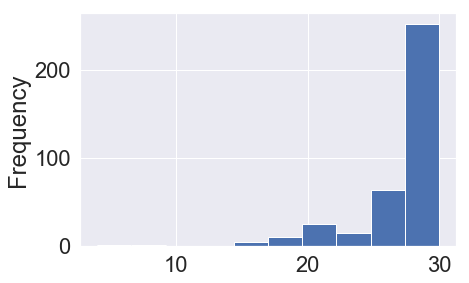

In [64]:
long_df['MMSE'].plot(kind='hist');

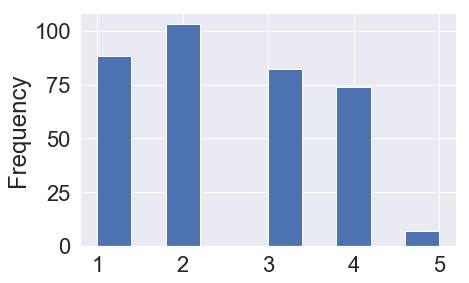

In [67]:
long_df['SES'].plot(kind='hist');

> Handling missing data is a tedious task. There are severeal methods in statistics but in general we call this process imputation. Missing data can cause multiple problems in statistical modelin process such as introducing significant bias and reductions in efficiency. Therefore, imputation is a way to avoid problems may arise from listwise deletion of missing values.
> 
>Three main methods are:
>- Listwise deletion
>- Single Imputation
>     - Hot Deck -a missing value was imputed from a randomly selected similar record
>     - Cold Deck -selects donors from another dataset
>     - Mean Substitution
>     - Median Substitution
>     - Regression -available information for complete and incomplete cases is used to predict the value of a specific variable
>     
>- Multiple Imputation



**Multiple Imputation**
Multiple imputation can be used in cases where the data is missing completely, missing at random, and even when the data is missing not at random. However, the primary method of multiple imputation is multiple imputation by chained equations (MICE).An important thing to note is that MICE should be implemented only when the missing data follow the missing at random mechanism. 

Information was taken from [Wikipedia](https://en.wikipedia.org/wiki/Imputation_%28statistics%29#Multiple_imputation)

In [68]:
# Fill missing values with median as the data is skewed 
long_df.loc[:, 'MMSE'] = long_df['MMSE'].fillna(long_df['MMSE'].median())

# Fill missing values with mean as the data similar to normal
long_df.loc[:, 'SES'] = round(long_df['SES'].fillna(long_df['SES'].mean()),2)

In [71]:
print('The total number of missing values at each column : \n' + str( long_df.isnull().sum()))

The total number of missing values at each column : 
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


> Now there is no missing values anymore, we can start off Exploratory Data Analysis and reveal relationships exist among features.